## Reading and visualizing multiple images

This basic tutorial covers how to read images stored multiple folders. **tsraster** stacks these images and renders one image with multiple bands.

In [ ]:
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

import tsraster
from tsraster.prep import sRead as tr

connect to the data directory

In [ ]:
path = r"E:\HIST\aet\5year"

the images in this directory are structured as: 
    - temperature:
        2005
          tmx-200501.tif
          tmx-200502.tif
          tmx-200503.tif
        2006
          tmx-200601.tif
          tmx-200602.tif
          tmx-200603.tif
        2007
          tmx-200701.tif
          tmx-200702.tif
          tmx-200703.tif
 

Accordingly, for temprature we have three years of data and for each year we have three monthly data. 

    'tmx-200501.tif': temprature (the variable), 2005 (the year), 01 (the month)


Read the images and print their corresponding name

In [ ]:
image_name = tr.image_names(path)
print(image_name)

Convert each to array and stack them as bands

In [ ]:
rasters = tr.image2array(path)

In [ ]:
# first image
rasters[0]

Check the total number of images (bands stacked together)

In [ ]:
rasters.shape

Visualize

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(10,10))

for i in range(0,rasters.shape[2]):
    img = rasters[:,:,i]
    i = i+1
    plt.subplot(3,3,i)
    plt.imshow(img, cmap="Greys")
    

In [ ]:
# clean up
del rasters
import gc
gc.collect()

# Feature extraction


This documents show how to extract important timeseries charcterstics from raster files.

In [ ]:
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

from rasterio.plot import show

import tsraster
from tsraster.prep import sRead as tr

from tsraster.calculate import calculateFeatures
from tsraster.calculate import features2array

connect to the data directory

In [ ]:
path = r"E:\HIST\aet\1year"

read the images and convert the arrays to a time-series dataframe 

In [ ]:
rasters = tr.ts_series(path)

Lets take a look at the time-series data

In [ ]:
rasters.head(10)

Accordingly, each pixel is identified by *id*. Since there are 9 bands (3 images per year), **tsraster** assigns each 9 first pixels the id number 1 and differentiate each by their respective year and month. Hence, the *time* column organizes and orders pixels by time. The *value* column represent the pixel value

We can summerize the data and examine its pattern.

In [ ]:
rasters.describe()

Let's go ahead and extract features

In [1]:
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

from rasterio.plot import show

import tsraster
from tsraster.prep import sRead as tr

from tsraster.calculate import calculateFeatures
from tsraster.calculate import features2array

path = r"C:\Users\mmann\Documents\ts-raster-example-data\2year"

In [2]:
ts_features = calculateFeatures(path,reset_df=False)

C:\Users\mmann\Documents\ts-raster-example-data\2year\my_df.pkl


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 50/50 [01:26<00:00,  1.50s/it]


The feature extraction swift through all bands and calculate values such maximum, minimum and mean, median. 
In this instance, 4 features of temprature data are generated for 9 rasters representing 3 months of 3 years of data.

Let's take a look at the summary of these features.

In [3]:
ts_features.describe()

variable,"value__agg_linear_trend__f_agg_""min""__chunk_len_6__attr_""slope""",value__maximum,value__mean,value__median,value__minimum
count,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06
mean,-2.851645e-01,3.531019e+01,9.136761e+00,5.104723e+00,5.388500e-02
std,1.094308e+00,4.682504e+01,1.279547e+01,8.852208e+00,4.497286e-01
min,-1.253110e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e-02
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,6.900800e+01,1.719428e+01,6.266000e+00,0.000000e+00
max,6.453188e+00,1.945075e+02,7.534869e+01,6.335938e+01,1.817000e+01


Next, convert these features to array, visualize or create a tiff

In [4]:
# first, get the original dimension/shape of image 
og_rasters = tr.image2array(path)
rows, cols, nums = og_rasters.shape


# convert df to matrix array
matrix_features = ts_features.values
num_of_layers = matrix_features.shape[1]


f2Array = matrix_features.reshape(rows, cols, num_of_layers)
print(f2Array.shape)


(1209, 941, 5)


visualize features

ValueError: num must be 1 <= num <= 4, not 5

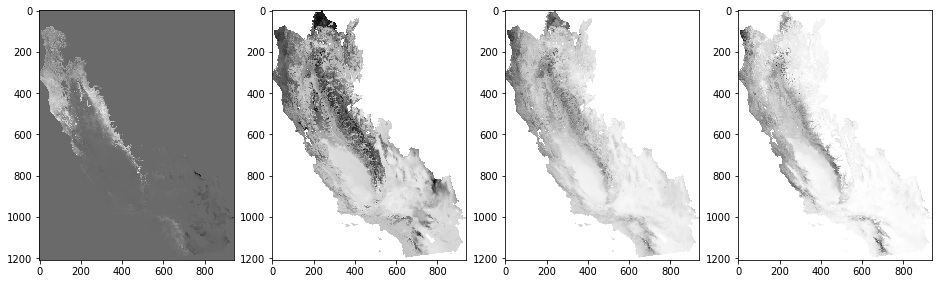

In [14]:
fig, ax = plt.subplots(6, 2,figsize=(16,10))

for i in range(0,f2Array.shape[2]):
    img = f2Array[:,:,i]
    i = i+1
    plt.subplot(1,4,i)
    plt.imshow(img, cmap="Greys")

In [9]:
int((f2Array.shape[2])/3)

1